# Radiation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import re
%matplotlib inline

savFigs = 'figures_Rui/FlameMasterAsInput/'

In [88]:
savFigs = 'figures_Rui/'

# Configuration

In [2]:
def write_input_file(x, XCO2, XH2O, Tinput, name_file):
    
    directory_input = "input/"
    input_file  = open(directory_input + name_file, 'w')
        
    # write number of elem
    
    input_file.write(str(len(x)) + "\n")
    s = "\t"
    for elem in zip(x, XCO2, XH2O, Tinput):
        
        line = s.join(map(str, elem))
        input_file.write(line + "\n")
        

## FlameMaster results as input

### import FlameMaster data

In [3]:
chi_st={}
data = {}
Tmax = {}
Cases = ['0.21']


In [22]:
model = 'Johansson'

data[model]={}
Tmax[model] = {}
chi_st[model]={}

for ThisCase in Cases:

    listFile = glob.glob('../../../../NewCombModel/New_comb_model/' + model+ '/' + ThisCase + "/OutMethane/*.kg")

    chi_st[model][ThisCase] = [float(re.split('tf',re.split('_0chi',i)[1])[0]) for i in listFile] # extract the chi_st from name of the file
    data[model][ThisCase]={}

    for idx,fileName in enumerate(listFile):
        data[model][ThisCase][chi_st[model][ThisCase][idx]] = \
        pd.read_csv(fileName, delimiter="\t", skiprows=1)

    chi_st[model][ThisCase].sort()
    Tmax[model][ThisCase] = np.zeros(len(chi_st[model][ThisCase]))

    for j, chi in enumerate(chi_st[model][ThisCase]):

        Tmax[model][ThisCase][j] = max(data[model][ThisCase][chi]['temperature [K]'])

In [4]:
model = 'Bordbar'

data[model]={}
Tmax[model] = {}
chi_st[model]={}

for ThisCase in Cases:

    listFile = glob.glob('../../../../NewCombModel/New_comb_model/' + model+ '/' + ThisCase + "/OutMethane/*.kg")

    chi_st[model][ThisCase] = [float(re.split('tf',re.split('_0chi',i)[1])[0]) for i in listFile] # extract the chi_st from name of the file
    data[model][ThisCase]={}

    for idx,fileName in enumerate(listFile):
        data[model][ThisCase][chi_st[model][ThisCase][idx]] = \
        pd.read_csv(fileName, delimiter="\t", skiprows=1)

    chi_st[model][ThisCase].sort()
    Tmax[model][ThisCase] = np.zeros(len(chi_st[model][ThisCase]))

    for j, chi in enumerate(chi_st[model][ThisCase]):

        Tmax[model][ThisCase][j] = max(data[model][ThisCase][chi]['temperature [K]'])

In [5]:
def physical_space(Z, D, chi):
    x = np.zeros(len(Z))
    x[0] = 0.000001
    for k, z in enumerate(Z):
        if k!=0 and k!=len(Z)-1:
            x[k] = x[k-1] + np.sqrt(2*D[k]/chi[k]) * (Z[k] - Z[k-1])
        if k==len(Z)-1:
            x[k] = 0.000001 + x[k-1]
    return x

def Get_HRR_Rad(x, J_per_m3s):
    W_per_m2 = 0.0
    for idx in range (1, len(x)-1):
        W_per_m2 += J_per_m3s[idx]*(x[idx]-x[idx-1])
    return W_per_m2

HRR = {}
sourceTerm = {}
physicalSpace = {}


In [23]:
model = 'Johansson'

HRR[model] = {}
physicalSpace[model] = {}
sourceTerm[model] = {}

for O2_case in Cases:
    HRR[model][O2_case] = np.zeros(len(chi_st[model][O2_case]))
    sourceTerm[model][O2_case] = np.zeros(len(chi_st[model][O2_case]))
    physicalSpace[model][O2_case] = {}
    for idx, chiSt in enumerate(chi_st[model][O2_case]):
        physicalSpace[model][O2_case][chiSt] = np.zeros(len(data[model][O2_case][chiSt]['Z']))
        MassDiff = data[model][O2_case][chiSt]['lambdaOverCp [kg/ms]']/data[model][O2_case][chiSt]['density']
        physicalSpace[model][O2_case][chiSt] = physical_space(data[model][O2_case][chiSt]['Z'],\
                                                        MassDiff, data[model][O2_case][chiSt]['chi [1/s]'])
        HRR[model][O2_case][idx] = Get_HRR_Rad( physicalSpace[model][O2_case][chiSt],\
                                                data[model][O2_case][chiSt]['HeatRelease [J/m^3s]'] )
        sourceTerm[model][O2_case][idx] = Get_HRR_Rad( physicalSpace[model][O2_case][chiSt],\
                                                -data[model][O2_case][chiSt]['ProdRateCH4 [kg/m^3s]'] )

In [6]:
model = 'Bordbar'

HRR[model] = {}
physicalSpace[model] = {}
sourceTerm[model] = {}

for O2_case in Cases:
    HRR[model][O2_case] = np.zeros(len(chi_st[model][O2_case]))
    sourceTerm[model][O2_case] = np.zeros(len(chi_st[model][O2_case]))
    physicalSpace[model][O2_case] = {}
    for idx, chiSt in enumerate(chi_st[model][O2_case]):
        physicalSpace[model][O2_case][chiSt] = np.zeros(len(data[model][O2_case][chiSt]['Z']))
        MassDiff = data[model][O2_case][chiSt]['lambdaOverCp [kg/ms]']/data[model][O2_case][chiSt]['density']
        physicalSpace[model][O2_case][chiSt] = physical_space(data[model][O2_case][chiSt]['Z'],\
                                                        MassDiff, data[model][O2_case][chiSt]['chi [1/s]'])
        HRR[model][O2_case][idx] = Get_HRR_Rad( physicalSpace[model][O2_case][chiSt],\
                                                data[model][O2_case][chiSt]['HeatRelease [J/m^3s]'] )
        sourceTerm[model][O2_case][idx] = Get_HRR_Rad( physicalSpace[model][O2_case][chiSt],\
                                                -data[model][O2_case][chiSt]['ProdRateCH4 [kg/m^3s]'] )

In [162]:
list(data['Bordbar']['0.21'])

[1.0, 0.025, 0.1, 8.0, 0.03, 15.0, 25.0]

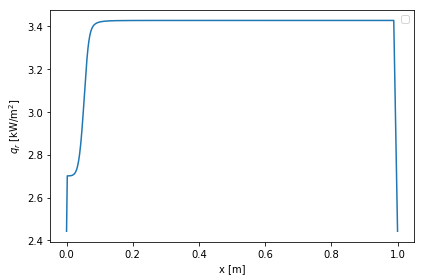

In [167]:
chiStValue = 25.0
X_CO2 = np.array( data['Bordbar']['0.21'][chiStValue]['X-CO2'])
X_H2O = np.array( data['Bordbar']['0.21'][chiStValue]['X-H2O'])
MR = X_H2O / X_CO2

plt.plot(data['Bordbar']['0.21'][chiStValue]['Z'], MR)

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.tight_layout()
plt.savefig(savFigs + "MR_FlameMaster" + str(chiStValue) +".png", format = "png", dpi = 200)

In [76]:
chiStValue = 0.1

model = 'Bordbar'
# model = 'Johansson'

x = np.array(physicalSpace[model]['0.21'][chiStValue])
XH2O = np.array(data[model]['0.21'][chiStValue]['X-H2O'])
XCO2 = np.array(data[model]['0.21'][chiStValue]['X-CO2'])
T = np.array(data[model]['0.21'][chiStValue]['temperature [K]'])

input_file = "FlameMaster_" + str(chiStValue) + ".dat"
write_input_file(x, XCO2, XH2O, T, input_file)


## Note: We should run ./radiation in terminal, not here 

In [ ]:
# ./radiation input/FlameMaster_25.0.dat Rui_cases/FlameMaster_25.0 False
# ./radiation input/FlameMaster_0.025.dat Rui_cases/FlameMaster_0.025 False

In [156]:
chiStValue = 25.0

fileName = 'Rui_cases/FlameMaster_' + str(chiStValue)

qrSNB = pd.read_csv("res/" + fileName + "/qr_SNB.res", delimiter="\t")
qrWSGG = pd.read_csv("res/" + fileName + "/qr_WSGG.res", delimiter="\t")
qrGrey = pd.read_csv("res/" + fileName + "/qr_Grey.res", delimiter="\t")
qrWSGGBordbar = pd.read_csv("res/" + fileName + "/qr_WSGGBordbar.res", delimiter="\t")
qrWSGGJohansson = pd.read_csv("res/" + fileName + "/qr_WSGGJohansson.res", delimiter="\t")

dqrSNB = pd.read_csv("res/" + fileName + "/dqr_SNB.res", delimiter="\t")
dqrWSGG = pd.read_csv("res/"  + fileName +  "/dqr_WSGG.res", delimiter="\t")
dqrGrey = pd.read_csv("res/"  + fileName +  "/dqr_Grey.res", delimiter="\t")
dqrWSGGBordbar = pd.read_csv("res/"  + fileName +  "/dqr_WSGGBordbar.res", delimiter="\t")
dqrWSGGJohansson = pd.read_csv("res/"  + fileName +  "/dqr_WSGGJohansson.res", delimiter="\t")

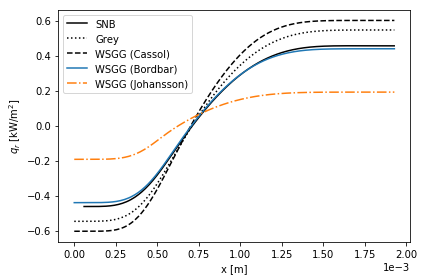

In [157]:

plt.plot(qrSNB["x [m]"],qrSNB["qr [W/m2]"]/1000,'k-', label="SNB")
plt.plot(qrGrey["x [m]"],qrGrey["qr [W/m2]"]/1000, ':k', label="Grey")
plt.plot(qrWSGG["x [m]"],qrWSGG["qr [W/m2]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(qrWSGGBordbar["x [m]"],qrWSGGBordbar["qr [W/m2]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(qrWSGGJohansson["x [m]"],qrWSGGJohansson["qr [W/m2]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.tight_layout()
plt.savefig(savFigs + "qr_FlameMaster" + str(chiStValue) +".png", format = "png", dpi = 200)

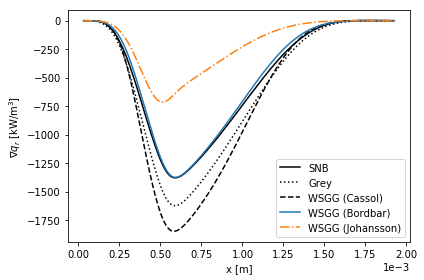

In [158]:
plt.plot(dqrSNB["x [m]"],-dqrSNB["dqr [W/m3]"]/1000,'-k', label="SNB")
plt.plot(dqrGrey["x [m]"],-dqrGrey["dqr [W/m3]"]/1000, ':k', label="Grey")
plt.plot(dqrWSGG["x [m]"],-dqrWSGG["dqr [W/m3]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.ylabel(r"$\nabla q_r$ [kW/m$^3$]")
# plt.ticklabel_format(style="sci")
plt.tight_layout()
plt.savefig(savFigs + "dqr_FlameMaster" + str(chiStValue) +".png", format = "png", dpi = 200)

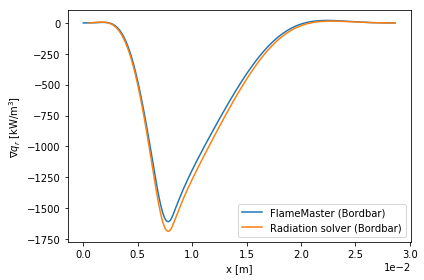

In [84]:

plt.plot(physicalSpace['Bordbar']['0.21'][chiStValue], \
         -data['Bordbar']['0.21'][chiStValue]['RadiationSource [J/m^3s]']/1000, label = 'FlameMaster (Bordbar)')

plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, label="Radiation solver (Bordbar)")

plt.legend()
plt.xlabel("x [m]")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.ylabel(r"$\nabla q_r$ [kW/m$^3$]")
# plt.ticklabel_format(style="sci")
plt.tight_layout()
plt.savefig(savFigs + "dqr_compare_RadSolver_FMBrodbar" + str(chiStValue) +".png", format = "png", dpi = 200)

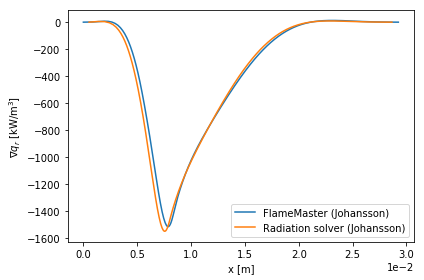

In [85]:

plt.plot(physicalSpace['Johansson']['0.21'][chiStValue], \
         -data['Johansson']['0.21'][chiStValue]['RadiationSource [J/m^3s]']/1000, label = 'FlameMaster (Johansson)')

plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, label="Radiation solver (Johansson)")

plt.legend()
plt.xlabel("x [m]")
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.ylabel(r"$\nabla q_r$ [kW/m$^3$]")
# plt.ticklabel_format(style="sci")
plt.tight_layout()
plt.savefig(savFigs + "dqr_compare_RadSolver_FMJohansson" + str(chiStValue) +".png", format = "png", dpi = 200)

# uniform

In [121]:
import os, sys

try:
    os.mkdir( "res/uniform", 0755 );
except:
    print("res/uniform already presents")

res/uniform already presents


## T = 1000 K p = 1 MR = 2

### input file

In [108]:
x = np.linspace(0, 1, 100)
# XH2O = np.linspace(0.1, 0.2, 100)
# XCO2 = np.linspace(0.2,0.1,100)
XCO2 = np.linspace(0.1, 0.1, 100)
# XH2O = np.linspace(0.2,0.2,100)
XH2O = np.linspace(0.3, 0.3, 100)

T = np.linspace(1000,1000,100)
T[0] = 1000.
T[-1] = 1000.

input_file = "uniform_T_1000_p1_MR_3.dat"
write_input_file(x, XCO2, XH2O, T, input_file)


### run

In [109]:
import subprocess

input_file = "uniform_T_1000_p1_MR_3.dat"

proc = subprocess.Popen(["./radiation", "input/" + input_file, "Rui_cases/MR=3.0", "False"], \
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE)

proc.wait()
out = proc.stdout.read()
#print(out)

### output

In [111]:
fileName = 'Rui_cases/MR=3.0/'

qrSNB = pd.read_csv("res/" + fileName + "/qr_SNB.res", delimiter="\t")
qrWSGG = pd.read_csv("res/" + fileName + "/qr_WSGG.res", delimiter="\t")
qrGrey = pd.read_csv("res/" + fileName + "/qr_Grey.res", delimiter="\t")
qrWSGGBordbar = pd.read_csv("res/" + fileName + "/qr_WSGGBordbar.res", delimiter="\t")
qrWSGGJohansson = pd.read_csv("res/" + fileName + "/qr_WSGGJohansson.res", delimiter="\t")

dqrSNB = pd.read_csv("res/" + fileName + "/dqr_SNB.res", delimiter="\t")
dqrWSGG = pd.read_csv("res/"  + fileName +  "/dqr_WSGG.res", delimiter="\t")
dqrGrey = pd.read_csv("res/"  + fileName +  "/dqr_Grey.res", delimiter="\t")
dqrWSGGBordbar = pd.read_csv("res/"  + fileName +  "/dqr_WSGGBordbar.res", delimiter="\t")
dqrWSGGJohansson = pd.read_csv("res/"  + fileName +  "/dqr_WSGGJohansson.res", delimiter="\t")

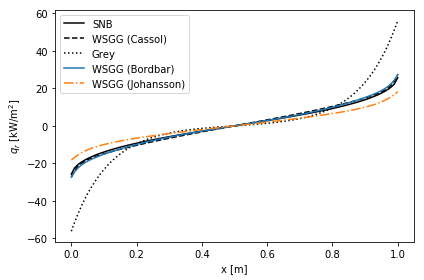

In [115]:
plt.plot(qrSNB["x [m]"],qrSNB["qr [W/m2]"]/1000,'k-', label="SNB")
plt.plot(qrWSGG["x [m]"],qrWSGG["qr [W/m2]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(qrGrey["x [m]"],qrGrey["qr [W/m2]"]/1000, ':k', label="Grey")
plt.plot(qrWSGGBordbar["x [m]"],qrWSGGBordbar["qr [W/m2]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(qrWSGGJohansson["x [m]"],qrWSGGJohansson["qr [W/m2]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.tight_layout()
plt.savefig(savFigs + "qr_uniform_T_1000_p1_MR_3.png", format = "png", dpi = 200)

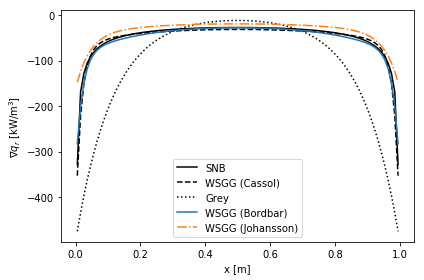

In [114]:
plt.plot(dqrSNB["x [m]"],-dqrSNB["dqr [W/m3]"]/1000,'-k', label="SNB")
plt.plot(dqrWSGG["x [m]"],-dqrWSGG["dqr [W/m3]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(dqrGrey["x [m]"],-dqrGrey["dqr [W/m3]"]/1000, ':k', label="Grey")
plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$\nabla q_r$ [kW/m$^3$]")
plt.tight_layout()
plt.savefig(savFigs + "dqr_uniform_T_1000_p1_MR_3.png", format = "png", dpi = 200)

## T = 1000 K p = 1 MR = 0.5

In [387]:
x = np.linspace(0, 0.1, 100)
# XH2O = np.linspace(0.3,0.3,100)
XCO2 = np.linspace(0.2, 0.1, 100)
XH2O = np.linspace(0.1, 0.2, 100)
# XH2O = np.linspace(0.2, 0.2, 100)
# XCO2 = np.linspace(0.1, 0.1, 100)
# XH2O = np.linspace(0.6666, 0.6666, 100)
# XCO2 = np.linspace(0.3333, 0.3333, 100)

T = np.linspace(1000, 1000, 100)
T[0] = 1000.
T[-1] = 1000.

input_file = "uniform_T_1000_p1_MR_2_L_0_1.dat"
write_input_file(x, XCO2, XH2O, T, input_file)

In [388]:
import subprocess

input_file = "uniform_T_1000_p1_MR_2_L_0_1.dat"

proc = subprocess.Popen(["./radiation", "input/" + input_file, "Rui_cases/uniform_2", "False"], \
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE)

proc.wait()
out = proc.stdout.read()

In [96]:
fileName = 'Rui_cases/uniform_2'

qrSNB = pd.read_csv("res/" + fileName + "/qr_SNB.res", delimiter="\t")
qrWSGG = pd.read_csv("res/" + fileName + "/qr_WSGG.res", delimiter="\t")
qrGrey = pd.read_csv("res/" + fileName + "/qr_Grey.res", delimiter="\t")
qrWSGGBordbar = pd.read_csv("res/" + fileName + "/qr_WSGGBordbar.res", delimiter="\t")
qrWSGGJohansson = pd.read_csv("res/" + fileName + "/qr_WSGGJohansson.res", delimiter="\t")

dqrSNB = pd.read_csv("res/" + fileName + "/dqr_SNB.res", delimiter="\t")
dqrWSGG = pd.read_csv("res/" + fileName + "/dqr_WSGG.res", delimiter="\t")
dqrGrey = pd.read_csv("res/" + fileName + "/dqr_Grey.res", delimiter="\t")
dqrWSGGBordbar = pd.read_csv("res/" + fileName + "/dqr_WSGGBordbar.res", delimiter="\t")
dqrWSGGJohansson = pd.read_csv("res/" + fileName + "/dqr_WSGGJohansson.res", delimiter="\t")

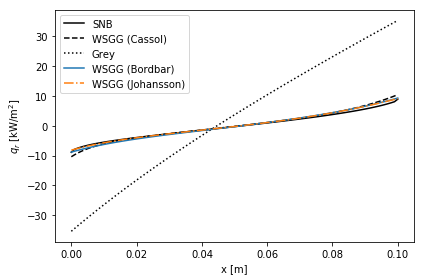

In [97]:
plt.plot(qrSNB["x [m]"],qrSNB["qr [W/m2]"]/1000,'-k', label="SNB")
plt.plot(qrWSGG["x [m]"],qrWSGG["qr [W/m2]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(qrGrey["x [m]"],qrGrey["qr [W/m2]"]/1000, ':k', label="Grey")
plt.plot(qrWSGGBordbar["x [m]"],qrWSGGBordbar["qr [W/m2]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(qrWSGGJohansson["x [m]"],qrWSGGJohansson["qr [W/m2]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.tight_layout()
plt.savefig(savFigs + "qr_uniform_T_1000_p1_MR_2_L_0_1.png", format = "png", dpi = 200)

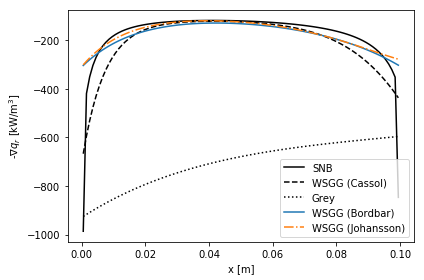

In [98]:
plt.plot(dqrSNB["x [m]"],-dqrSNB["dqr [W/m3]"]/1000,'k-', label="SNB")
plt.plot(dqrWSGG["x [m]"],-dqrWSGG["dqr [W/m3]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(dqrGrey["x [m]"],-dqrGrey["dqr [W/m3]"]/1000, ':k', label="Grey")
plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.xlabel("x [m]")
plt.ylabel(r"-$\nabla q_r$ [kW/m$^3$]")
plt.legend()
plt.tight_layout()
plt.savefig(savFigs + "dqr_uniform_T_1000_p1_MR_2_L_0_1.png", format = "png", dpi = 200)

In [135]:
import os, sys

try:
    os.mkdir( "res/cos", 0755 );
except:
    print("res/cos already presents")

res/cos already presents


In [121]:
L = 1.0
x = np.linspace(0, L, 100)

XCO2 = np.linspace(0.1, 0.1, 100)
# XH2O = np.linspace(0.2, 0.2, 100)
XH2O = np.linspace(0.3, 0.3, 100)

T = 1250-750*np.cos(2*np.pi*x/L)
#T = 1500*np.exp(-(xd-S/2.)**2/(2*0.01))+300
#T = 400+1400*np.sin(2*math.pi*xd/S)**2


input_file = "cos_T_1000_p1_MR_3_L_1_0.dat"
write_input_file(x, XCO2, XH2O, T, input_file)

In [122]:
import subprocess

input_file = "cos_T_1000_p1_MR_3_L_1_0.dat"

proc = subprocess.Popen(["./radiation", "input/" + input_file, "Rui_cases/cos/MR=3.0", "False"], \
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE)

proc.wait()
out = proc.stdout.read()

In [130]:
fileName = 'Rui_cases/cos/MR=2.0'

qrSNB = pd.read_csv("res/" + fileName + "/qr_SNB.res", delimiter="\t")
qrWSGG = pd.read_csv("res/" + fileName + "/qr_WSGG.res", delimiter="\t")
qrGrey = pd.read_csv("res/" + fileName + "/qr_Grey.res", delimiter="\t")
qrWSGGBordbar = pd.read_csv("res/" + fileName + "/qr_WSGGBordbar.res", delimiter="\t")
qrWSGGJohansson = pd.read_csv("res/" + fileName + "/qr_WSGGJohansson.res", delimiter="\t")

dqrSNB = pd.read_csv("res/" + fileName + "/dqr_SNB.res", delimiter="\t")
dqrWSGG = pd.read_csv("res/" + fileName + "/dqr_WSGG.res", delimiter="\t")
dqrGrey = pd.read_csv("res/" + fileName + "/dqr_Grey.res", delimiter="\t")
dqrWSGGBordbar = pd.read_csv("res/" + fileName + "/dqr_WSGGBordbar.res", delimiter="\t")
dqrWSGGJohansson = pd.read_csv("res/" + fileName + "/dqr_WSGGJohansson.res", delimiter="\t")

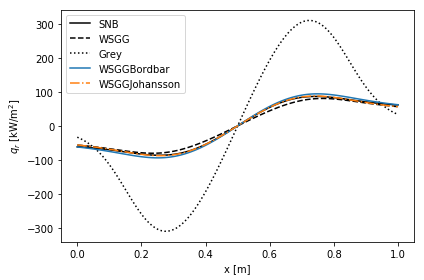

In [131]:
plt.plot(qrSNB["x [m]"],qrSNB["qr [W/m2]"]/1000,'-k', label="SNB")
plt.plot(qrWSGG["x [m]"],qrWSGG["qr [W/m2]"]/1000,'--k', label="WSGG")
plt.plot(qrGrey["x [m]"],qrGrey["qr [W/m2]"]/1000, ':k', label="Grey")
plt.plot(qrWSGGBordbar["x [m]"],qrWSGGBordbar["qr [W/m2]"]/1000, '-', label="WSGGBordbar")
plt.plot(qrWSGGJohansson["x [m]"],qrWSGGJohansson["qr [W/m2]"]/1000, '-.', label="WSGGJohansson", fillstyle="none")

plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.tight_layout()
plt.savefig(savFigs + "qr_cos_p1_MR_2_L_1_0.png", format = "png", dpi = 200)

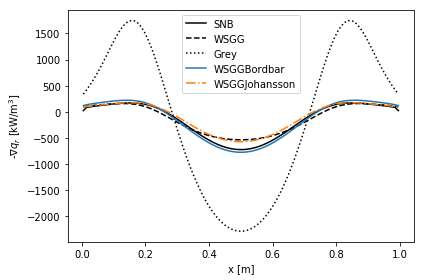

In [128]:
plt.plot(dqrSNB["x [m]"],-dqrSNB["dqr [W/m3]"]/1000,'-k', label="SNB")
plt.plot(dqrWSGG["x [m]"],-dqrWSGG["dqr [W/m3]"]/1000,'--k', label="WSGG")
plt.plot(dqrGrey["x [m]"],-dqrGrey["dqr [W/m3]"]/1000, ':k', label="Grey")
plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, '-', label="WSGGBordbar")
plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, '-.', label="WSGGJohansson", fillstyle="none")

plt.xlabel("x [m]")
plt.ylabel(r"-$\nabla q_r$ [kW/m$^3$]")
plt.legend()
plt.tight_layout()
plt.savefig(savFigs + "dqr_cos_p1_MR_2_L_1_0.png", format = "png", dpi = 200)

In [141]:
import os, sys

try:
    os.mkdir( "res/exp", 0755 );
except:
    print("res/exp already presents")

res/exp already presents


In [137]:
L = 1.0
x = np.linspace(0,L,100)

XCO2 = np.linspace(0.1, 0.1, 100)
XH2O = np.linspace(0.2, 0.2, 100)
# XH2O = np.linspace(0.3, 0.3, 100)
#T = 1250-750*np.cos(2*np.pi*x/L)
T = 1500*np.exp(-(x-L/2.)**2/(2*0.01))+300
#T = 400+1400*np.sin(2*math.pi*xd/S)**2

input_file = "exp_T_1000_p1_MR_3_L_1_0.dat"
write_input_file(x, XCO2, XH2O, T, input_file)

In [139]:
import subprocess
input_file = "exp_T_1000_p1_MR_2_L_1_0.dat"
proc = subprocess.Popen(["./radiation", "input/" + input_file, "Rui_cases/exp/MR=2.0", "False"], \
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE)

proc.wait()
out = proc.stdout.read()

In [143]:
fileName = "Rui_cases/exp/MR=3.0"

qrSNB = pd.read_csv("res/" + fileName + "/qr_SNB.res", delimiter="\t")
qrWSGG = pd.read_csv("res/"  + fileName +  "/qr_WSGG.res", delimiter="\t")
qrGrey = pd.read_csv("res/"  + fileName + "/qr_Grey.res", delimiter="\t")
qrWSGGBordbar = pd.read_csv("res/" + fileName + "/qr_WSGGBordbar.res", delimiter="\t")
qrWSGGJohansson = pd.read_csv("res/"  + fileName + "/qr_WSGGJohansson.res", delimiter="\t")

dqrSNB = pd.read_csv("res/" + fileName + "/dqr_SNB.res", delimiter="\t")
dqrWSGG = pd.read_csv("res/" + fileName + "/dqr_WSGG.res", delimiter="\t")
dqrGrey = pd.read_csv("res/" + fileName + "/dqr_Grey.res", delimiter="\t")
dqrWSGGBordbar = pd.read_csv("res/" + fileName + "/dqr_WSGGBordbar.res", delimiter="\t")
dqrWSGGJohansson = pd.read_csv("res/" + fileName + "/dqr_WSGGJohansson.res", delimiter="\t")

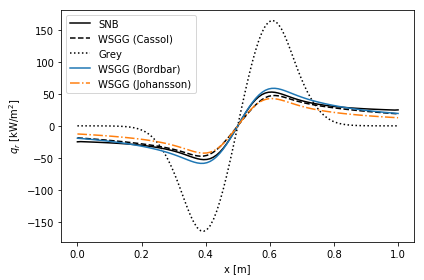

In [144]:
plt.plot(qrSNB["x [m]"],qrSNB["qr [W/m2]"]/1000,'-k', label="SNB")
plt.plot(qrWSGG["x [m]"],qrWSGG["qr [W/m2]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(qrGrey["x [m]"],qrGrey["qr [W/m2]"]/1000, ':k', label="Grey")
plt.plot(qrWSGGBordbar["x [m]"],qrWSGGBordbar["qr [W/m2]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(qrWSGGJohansson["x [m]"],qrWSGGJohansson["qr [W/m2]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")


plt.legend()
plt.xlabel("x [m]")
plt.ylabel(r"$q_r$ [kW/m$^2$]")
plt.tight_layout()
plt.savefig(savFigs + "qr_exp_p1_MR_3_L_1_0.png", format = "png", dpi = 200)

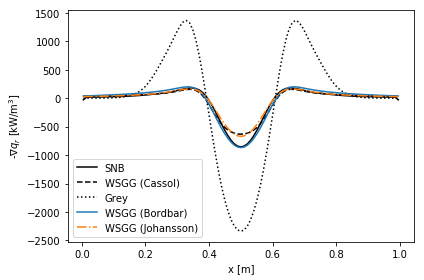

In [145]:
plt.plot(dqrSNB["x [m]"],-dqrSNB["dqr [W/m3]"]/1000,'-k', label="SNB")
plt.plot(dqrWSGG["x [m]"],-dqrWSGG["dqr [W/m3]"]/1000,'--k', label="WSGG (Cassol)")
plt.plot(dqrGrey["x [m]"],-dqrGrey["dqr [W/m3]"]/1000, ':k', label="Grey")
plt.plot(dqrWSGGBordbar["x [m]"],-dqrWSGGBordbar["dqr [W/m3]"]/1000, '-', label="WSGG (Bordbar)")
plt.plot(dqrWSGGJohansson["x [m]"],-dqrWSGGJohansson["dqr [W/m3]"]/1000, '-.', label="WSGG (Johansson)", fillstyle="none")

plt.xlabel("x [m]")
plt.ylabel(r"-$\nabla q_r$ [kW/m$^3$]")
plt.legend()
plt.tight_layout()
plt.savefig(savFigs + "dqr_exp_p1_MR_3_L_1_0.png", format = "png", dpi = 200)